# Clusterização - Otimização de Logística

### Importação dos Dados

In [1]:
#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.cluster import KMeans

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#Ajustando formatos
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

In [3]:
#Coleta de Dados
dados = pd.read_csv('BASE_VENDAS.csv', sep=';')

### Validação e Tratativa da Base de Dados Inicial

In [4]:
#Avaliação visual da base de dados
dados

MES   ANO     CIDADE ESTADO CAPITAL    LAT   LONG  QTD_VENDAS
0      1  2018  Sao Paulo     SP     SIM -23.54 -46.63       10000
1      2  2018  Sao Paulo     SP     SIM -23.54 -46.63       12000
2      3  2018  Sao Paulo     SP     SIM -23.54 -46.63        9000
3      4  2018  Sao Paulo     SP     SIM -23.54 -46.63        8000
4      5  2018  Sao Paulo     SP     SIM -23.54 -46.63        8500
..   ...   ...        ...    ...     ...    ...    ...         ...
955    8  2022   Brasilia     DF     SIM -15.77 -47.93        5616
956    9  2022   Brasilia     DF     SIM -15.77 -47.93        6408
957   10  2022   Brasilia     DF     SIM -15.77 -47.93        7056
958   11  2022   Brasilia     DF     SIM -15.77 -47.93        7128
959   12  2022   Brasilia     DF     SIM -15.77 -47.93       10080

[960 rows x 8 columns]

In [5]:
#Avaliação estatística dos dados da base
dados.describe()

MES     ANO    LAT   LONG  QTD_VENDAS
count 960.00  960.00 960.00 960.00      960.00
mean    6.50 2020.00 -17.58 -45.17     7247.64
std     3.45    1.41   7.32   5.54     3938.49
min     1.00 2018.00 -30.03 -54.64      397.00
25%     3.75 2019.00 -22.97 -48.56     4498.25
50%     6.50 2020.00 -20.12 -47.05     6847.50
75%     9.25 2021.00 -12.27 -42.04     9619.75
max    12.00 2022.00  -3.71 -34.88    25200.00

In [6]:
#Verificação sobre possíveis dados nulos para tratativa
dados.isnull().sum()

MES           0
ANO           0
CIDADE        0
ESTADO        0
CAPITAL       0
LAT           0
LONG          0
QTD_VENDAS    0
dtype: int64

In [7]:
#Validação de dados de vendas por ano e cidade
dados[['ANO', 'CIDADE', 'QTD_VENDAS']].groupby(['ANO', 'CIDADE']).sum().reset_index()

ANO                      CIDADE  QTD_VENDAS
0   2018              Belo Horizonte       78610
1   2018                    Brasilia       44920
2   2018                Campo Grande        8984
3   2018                    Curitiba       83102
4   2018                   Fortaleza       62888
..   ...                         ...         ...
75  2022              Rio de Janeiro      171819
76  2022                    Salvador      101070
77  2022  Santa Rita do Passa Quatro       40428
78  2022         Sao Jose dos Campos      121284
79  2022                   Sao Paulo      202140

[80 rows x 3 columns]

In [8]:
#Validação de dados de vendas por cidade
dados[['CIDADE', 'QTD_VENDAS']].groupby('CIDADE').sum().sort_values(by='QTD_VENDAS', ascending=False).reset_index()

CIDADE  QTD_VENDAS
0                    Sao Paulo      714346
1               Rio de Janeiro      607198
2                 Porto Alegre      585765
3               Ribeirao Preto      571476
4                      Goiania      535762
5                     Curitiba      528615
6               Belo Horizonte      500043
7                        Natal      457181
8          Sao Jose dos Campos      428609
9                    Fortaleza      400034
10                      Palmas      392892
11                      Recife      392892
12                    Salvador      357173
13                    Brasilia      285737
14  Santa Rita do Passa Quatro      142870
15                Campo Grande       57146

In [9]:
#Levantamento dos dados de estado na base
dados['ESTADO'].unique()

array(['SP', 'RJ', 'MG', 'GO', 'TO', 'BA', 'PE', 'RN', 'CE', 'PR', 'RS',
       'MS', 'DF'], dtype=object)

In [10]:
#Inclusão de campo REGIAO com dados da região baseados no estado
dados['REGIAO'] = 'n/a'
dados['REGIAO'] = dados['ESTADO'].apply(lambda x: 'Sudeste' if x=='SP' else
                                                  'Sudeste' if x=='RJ' else
                                                  'Sudeste' if x=='MG' else
                                                  'Sul' if x=='PR' else
                                                  'Sul' if x=='RS' else
                                                  'Centro Oeste' if x=='GO' else
                                                  'Centro Oeste' if x=='DF' else
                                                  'Centro Oeste' if x=='MS' else
                                                  'Norte' if x=='TO' else
                                                  'Nordeste' if x=='BA' else
                                                  'Nordeste' if x=='PE' else
                                                  'Nordeste' if x=='RN' else
                                                  'Nordeste' if x=='CE' else
                                                  'N/A')

In [11]:
#Validação de dados do campo REGIAO
dados[['ESTADO', 'REGIAO', 'QTD_VENDAS']].groupby('REGIAO').sum().reset_index()

REGIAO  QTD_VENDAS
0  Centro Oeste      878645
1      Nordeste     1607280
2         Norte      392892
3       Sudeste     2964542
4           Sul     1114380

In [12]:
#Validação da base final
dados

MES   ANO     CIDADE ESTADO CAPITAL    LAT   LONG  QTD_VENDAS  \
0      1  2018  Sao Paulo     SP     SIM -23.54 -46.63       10000   
1      2  2018  Sao Paulo     SP     SIM -23.54 -46.63       12000   
2      3  2018  Sao Paulo     SP     SIM -23.54 -46.63        9000   
3      4  2018  Sao Paulo     SP     SIM -23.54 -46.63        8000   
4      5  2018  Sao Paulo     SP     SIM -23.54 -46.63        8500   
..   ...   ...        ...    ...     ...    ...    ...         ...   
955    8  2022   Brasilia     DF     SIM -15.77 -47.93        5616   
956    9  2022   Brasilia     DF     SIM -15.77 -47.93        6408   
957   10  2022   Brasilia     DF     SIM -15.77 -47.93        7056   
958   11  2022   Brasilia     DF     SIM -15.77 -47.93        7128   
959   12  2022   Brasilia     DF     SIM -15.77 -47.93       10080   

           REGIAO  
0         Sudeste  
1         Sudeste  
2         Sudeste  
3         Sudeste  
4         Sudeste  
..            ...  
955  Centro Oeste  
956  Centro Oeste  
957  Centro Oeste  
958  Centro Oeste  
959  Centro Oeste  

[960 rows x 9 columns]

### Validação de Dados com Visualização

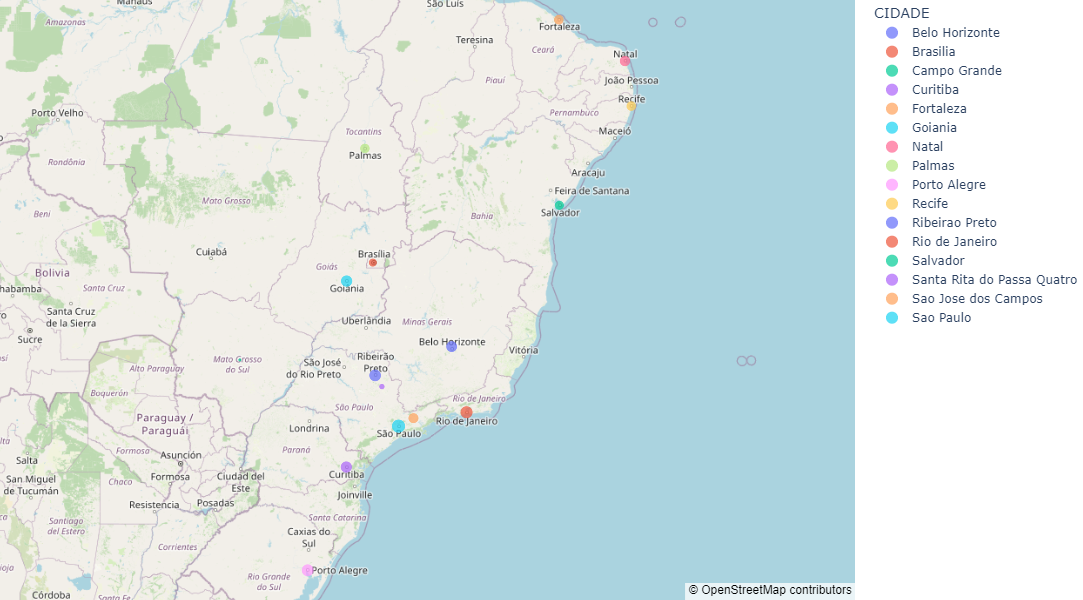

In [13]:
#Plotagem do mapa com as cidades que registraram vendas
mapa = dados[['CIDADE', 'LAT', 'LONG', 'QTD_VENDAS']].groupby(['CIDADE', 'LAT', 'LONG']).sum().reset_index()
fig = px.scatter_mapbox(mapa,
                       lat='LAT',
                       lon='LONG',
                       color='CIDADE',
                       size='QTD_VENDAS',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 10,
                       zoom = 3.8)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

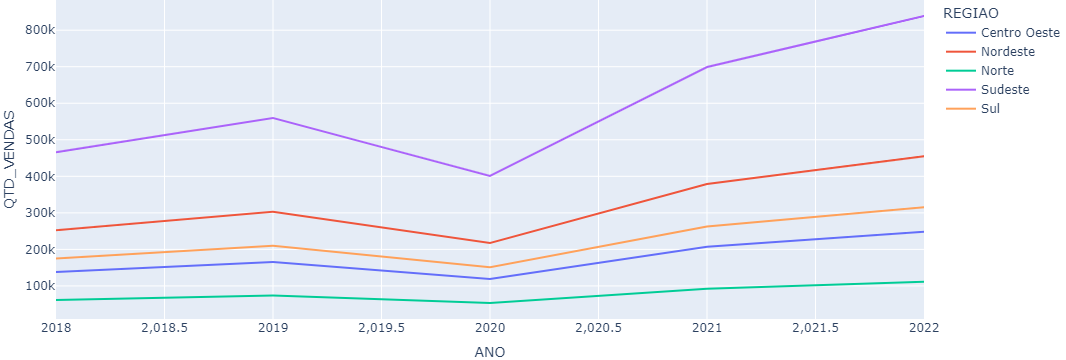

In [14]:
#Plotagem de gráfico para avaliação de dados de vendas por região
grafico = dados[['ANO', 'REGIAO', 'QTD_VENDAS']].groupby(['ANO', 'REGIAO']).sum().reset_index()
fig2 = px.line(grafico, x='ANO', y='QTD_VENDAS', color='REGIAO')
fig2.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

### Implementação de Algoritmo de Clusterização

In [15]:
#Criação de base de dados apenas com as coordenadas
coordenadas = dados[['LAT', 'LONG']]
coordenadas

LAT   LONG
0   -23.54 -46.63
1   -23.54 -46.63
2   -23.54 -46.63
3   -23.54 -46.63
4   -23.54 -46.63
..     ...    ...
955 -15.77 -47.93
956 -15.77 -47.93
957 -15.77 -47.93
958 -15.77 -47.93
959 -15.77 -47.93

[960 rows x 2 columns]

In [16]:
#Aplicação do Método Elbow para avaliação do número ideal de Clusters
dist = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(coordenadas)
    dist.append(kmeanModel.inertia_)

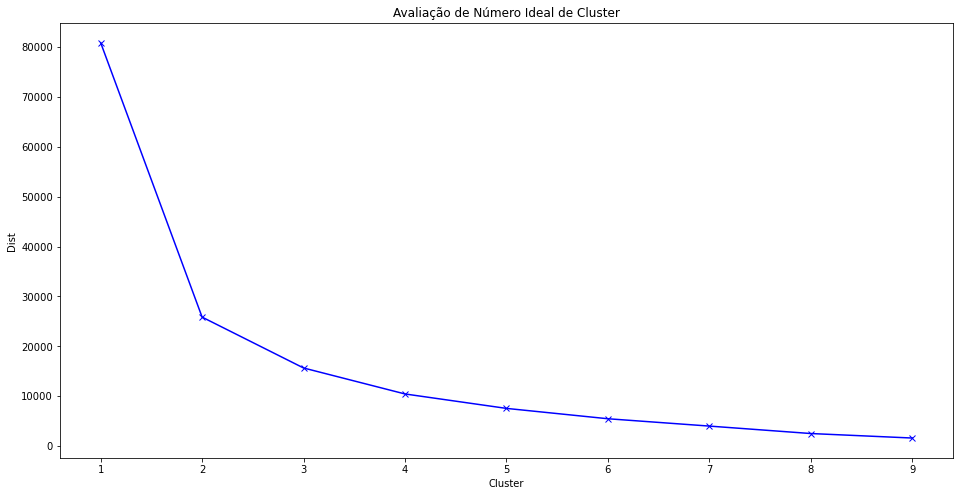

In [17]:
#Plotagem do Método Elbow para avaliação do número ideal de Clusters
plt.figure(figsize=(16,8))
plt.plot(K, dist, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Dist')
plt.title('Avaliação de Número Ideal de Cluster')
plt.show()

In [18]:
#Criação de base de dados com coordenadas e cidades para processamento no algoritmo de clusterização
cidades = dados[['CIDADE', 'LAT', 'LONG']]
cidades

CIDADE    LAT   LONG
0    Sao Paulo -23.54 -46.63
1    Sao Paulo -23.54 -46.63
2    Sao Paulo -23.54 -46.63
3    Sao Paulo -23.54 -46.63
4    Sao Paulo -23.54 -46.63
..         ...    ...    ...
955   Brasilia -15.77 -47.93
956   Brasilia -15.77 -47.93
957   Brasilia -15.77 -47.93
958   Brasilia -15.77 -47.93
959   Brasilia -15.77 -47.93

[960 rows x 3 columns]

In [19]:
#Iniciando configurações para clusterização e definindo 3 clusters
kmeans = KMeans(3)
kmeans.fit(coordenadas)

KMeans(n_clusters=3)

In [20]:
#Definindo os clusters com base nas coordenadas da base de dados "coordenadas"
clusters = kmeans.fit_predict(coordenadas)

In [21]:
#Criação de cópia da base final com adição dos dados de CLUSTER
dados_clusters = dados.copy()
dados_clusters['CLUSTER'] = clusters
dados_clusters

MES   ANO     CIDADE ESTADO CAPITAL    LAT   LONG  QTD_VENDAS  \
0      1  2018  Sao Paulo     SP     SIM -23.54 -46.63       10000   
1      2  2018  Sao Paulo     SP     SIM -23.54 -46.63       12000   
2      3  2018  Sao Paulo     SP     SIM -23.54 -46.63        9000   
3      4  2018  Sao Paulo     SP     SIM -23.54 -46.63        8000   
4      5  2018  Sao Paulo     SP     SIM -23.54 -46.63        8500   
..   ...   ...        ...    ...     ...    ...    ...         ...   
955    8  2022   Brasilia     DF     SIM -15.77 -47.93        5616   
956    9  2022   Brasilia     DF     SIM -15.77 -47.93        6408   
957   10  2022   Brasilia     DF     SIM -15.77 -47.93        7056   
958   11  2022   Brasilia     DF     SIM -15.77 -47.93        7128   
959   12  2022   Brasilia     DF     SIM -15.77 -47.93       10080   

           REGIAO  CLUSTER  
0         Sudeste        1  
1         Sudeste        1  
2         Sudeste        1  
3         Sudeste        1  
4         Sudeste        1  
..            ...      ...  
955  Centro Oeste        2  
956  Centro Oeste        2  
957  Centro Oeste        2  
958  Centro Oeste        2  
959  Centro Oeste        2  

[960 rows x 10 columns]

### Validação dos Dados após Implementação do Algoritmo de Clusterização

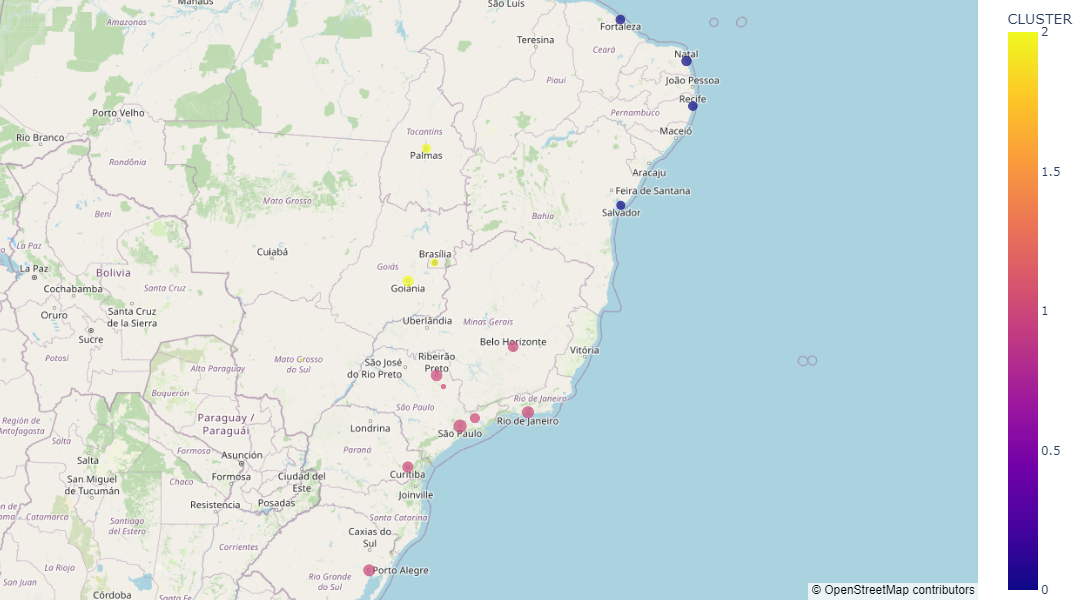

In [22]:
#Plotagem do mapa demonstrando os clusters
mapa_cluster = dados_clusters[['CIDADE', 'LAT', 'LONG', 'QTD_VENDAS', 'CLUSTER']].groupby(['CIDADE', 'LAT', 'LONG', 'CLUSTER']).sum().reset_index()
fig3 = px.scatter_mapbox(mapa_cluster,
                       lat='LAT',
                       lon='LONG',
                       color='CLUSTER',
                       size='QTD_VENDAS',
                       hover_name='CIDADE',
                       size_max = 10,
                       zoom = 3.8)
fig3.update_layout(mapbox_style = 'open-street-map')
fig3.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig3.show()

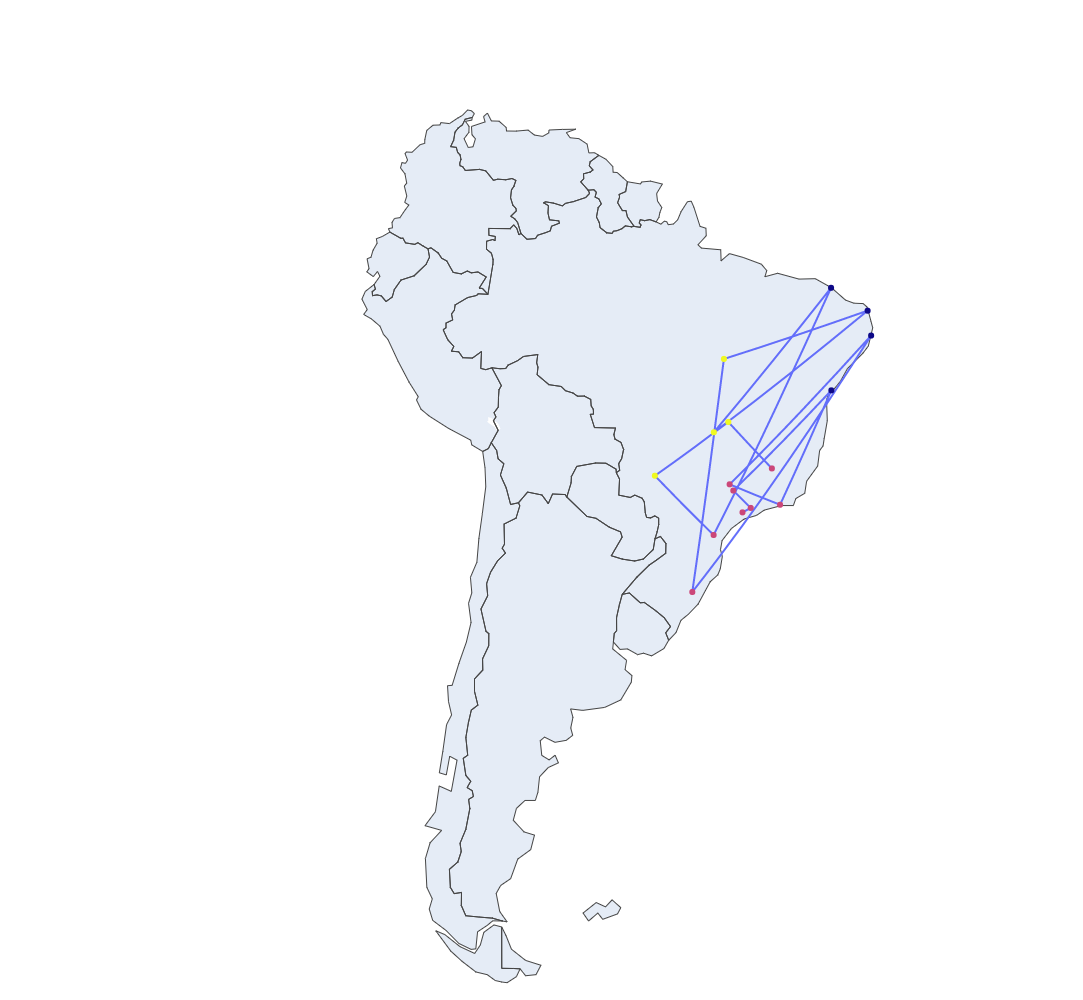

In [23]:
#Criação de mapa com os pontos (cidades) interligados
fig4 = go.Figure(data=go.Scattergeo(
        lat = mapa_cluster['LAT'],
        lon = mapa_cluster['LONG'],
        text = mapa_cluster['CIDADE'],
        mode = 'markers+lines',
        marker_color = mapa_cluster['CLUSTER'],
        ))
fig4.update_layout(
        title = 'VENDAS POR CIDADE',
        geo_scope='south america',
        height=1000,
        margin={"r":0,"t":0,"l":0,"b":0}
    )
fig4.show()

In [24]:
#Validação de dados de vendas com agrupamento de região e cluster
dados_clusters[['REGIAO', 'CLUSTER', 'QTD_VENDAS']].groupby(['REGIAO', 'CLUSTER']).sum().sort_values(by='CLUSTER', ascending=True).reset_index()

REGIAO  CLUSTER  QTD_VENDAS
0      Nordeste        0     1607280
1       Sudeste        1     2964542
2           Sul        1     1114380
3  Centro Oeste        2      878645
4         Norte        2      392892

In [25]:
#Validação de dados de vendas com agrupamento de cluster
dados_clusters[['CLUSTER', 'QTD_VENDAS']].groupby( 'CLUSTER').sum().sort_values(by='CLUSTER', ascending=True).reset_index()

CLUSTER  QTD_VENDAS
0        0     1607280
1        1     4078922
2        2     1271537

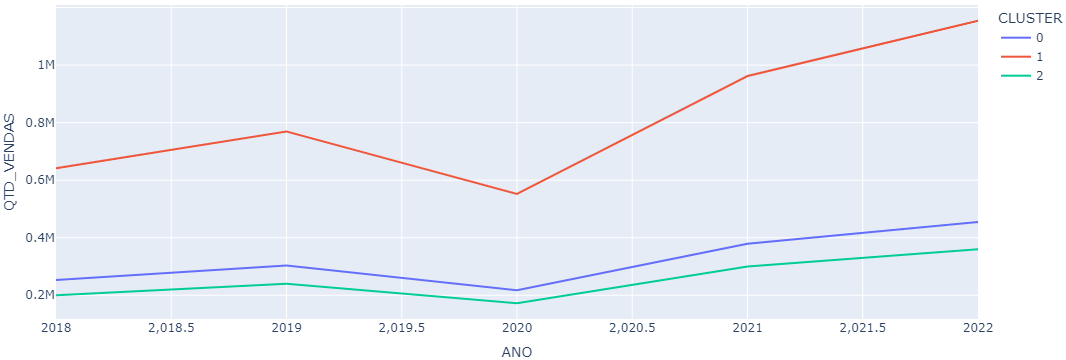

In [26]:
#Plotagem de gráfico para avaliação de dados de vendas por cluster
grafico_2 = dados_clusters[['ANO', 'CLUSTER', 'QTD_VENDAS']].groupby(['ANO', 'CLUSTER']).sum().reset_index()
fig5 = px.line(grafico_2, x='ANO', y='QTD_VENDAS', color='CLUSTER')
fig5.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig5.show()

In [27]:
#Validação da Base de Dados Final com dados de Clusters
dados_clusters

MES   ANO     CIDADE ESTADO CAPITAL    LAT   LONG  QTD_VENDAS  \
0      1  2018  Sao Paulo     SP     SIM -23.54 -46.63       10000   
1      2  2018  Sao Paulo     SP     SIM -23.54 -46.63       12000   
2      3  2018  Sao Paulo     SP     SIM -23.54 -46.63        9000   
3      4  2018  Sao Paulo     SP     SIM -23.54 -46.63        8000   
4      5  2018  Sao Paulo     SP     SIM -23.54 -46.63        8500   
..   ...   ...        ...    ...     ...    ...    ...         ...   
955    8  2022   Brasilia     DF     SIM -15.77 -47.93        5616   
956    9  2022   Brasilia     DF     SIM -15.77 -47.93        6408   
957   10  2022   Brasilia     DF     SIM -15.77 -47.93        7056   
958   11  2022   Brasilia     DF     SIM -15.77 -47.93        7128   
959   12  2022   Brasilia     DF     SIM -15.77 -47.93       10080   

           REGIAO  CLUSTER  
0         Sudeste        1  
1         Sudeste        1  
2         Sudeste        1  
3         Sudeste        1  
4         Sudeste        1  
..            ...      ...  
955  Centro Oeste        2  
956  Centro Oeste        2  
957  Centro Oeste        2  
958  Centro Oeste        2  
959  Centro Oeste        2  

[960 rows x 10 columns]

In [28]:
#Validação de dados de vendas com agrupamento de região e cluster
dados_clusters[['REGIAO', 'CLUSTER', 'QTD_VENDAS']].groupby(['REGIAO', 'CLUSTER']).sum().sort_values(by='CLUSTER', ascending=True).reset_index()

REGIAO  CLUSTER  QTD_VENDAS
0      Nordeste        0     1607280
1       Sudeste        1     2964542
2           Sul        1     1114380
3  Centro Oeste        2      878645
4         Norte        2      392892

### Implementação de Algoritmo de Clusterização para definição do Centroide Geral

In [29]:
#Iniciando configurações para clusterização definindo 1 cluster (Centroide Geral)
kmeans2 = KMeans(1)
kmeans2.fit(coordenadas)

KMeans(n_clusters=1)

In [30]:
#Localizando o Centroide Geral
centroide = kmeans2.cluster_centers_
centroide

array([[-17.58125 , -45.169375]])

In [31]:
#Criação de Dataframe com as coordenadas do Centroide Geral
centroide_mapa = pd.DataFrame(centroide, columns=['LAT', 'LONG'])
centroide_mapa

LAT   LONG
0 -17.58 -45.17

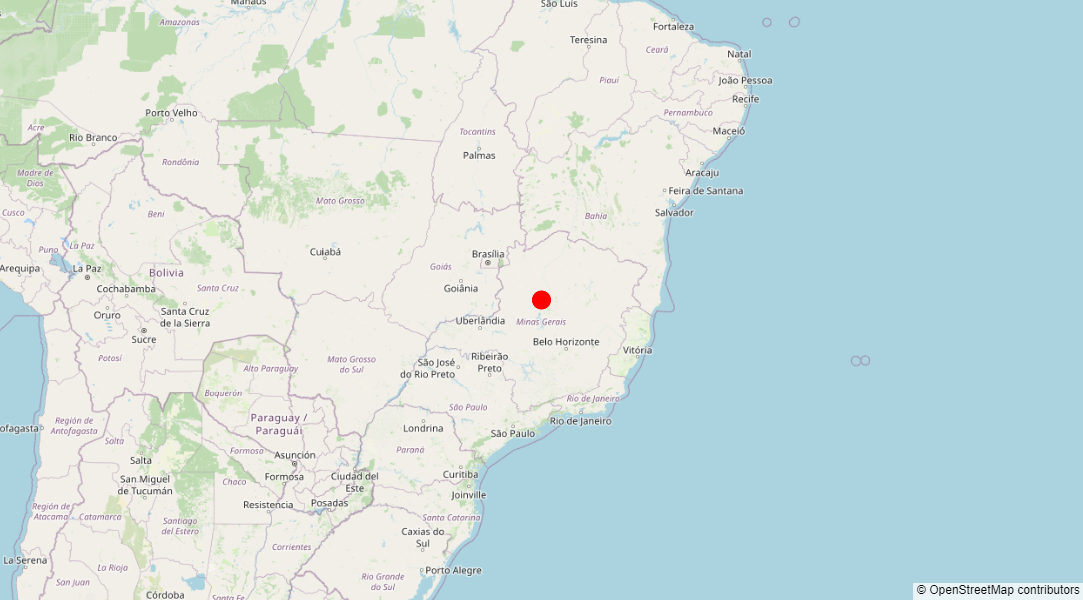

In [32]:
#Plotagem do mapa demonstrando a localização do Centroide Geral
fig6 = px.scatter_mapbox(centroide_mapa,
                       lat='LAT',
                       lon='LONG',
                       zoom = 3.8)
fig6.update_layout(mapbox_style = 'open-street-map')
fig6.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig6.update_traces(marker = dict(size=20, color='red'))
fig6.show()

### Implementação de Algoritmo de Clusterização para definição dos Centroides Adicionais (análises futuras)

In [33]:
#Localizando os centroides do Clusters
centroides = kmeans.cluster_centers_
centroides

array([[ -7.63   , -36.7825 ],
       [-23.4675 , -46.92875],
       [-15.76   , -50.0375 ]])

In [34]:
#Criação de Dataframe com as coordenadas dos 3 centroides
centroides_mapa = pd.DataFrame(centroides, columns=['LAT', 'LONG'])
centroides_mapa

LAT   LONG
0  -7.63 -36.78
1 -23.47 -46.93
2 -15.76 -50.04

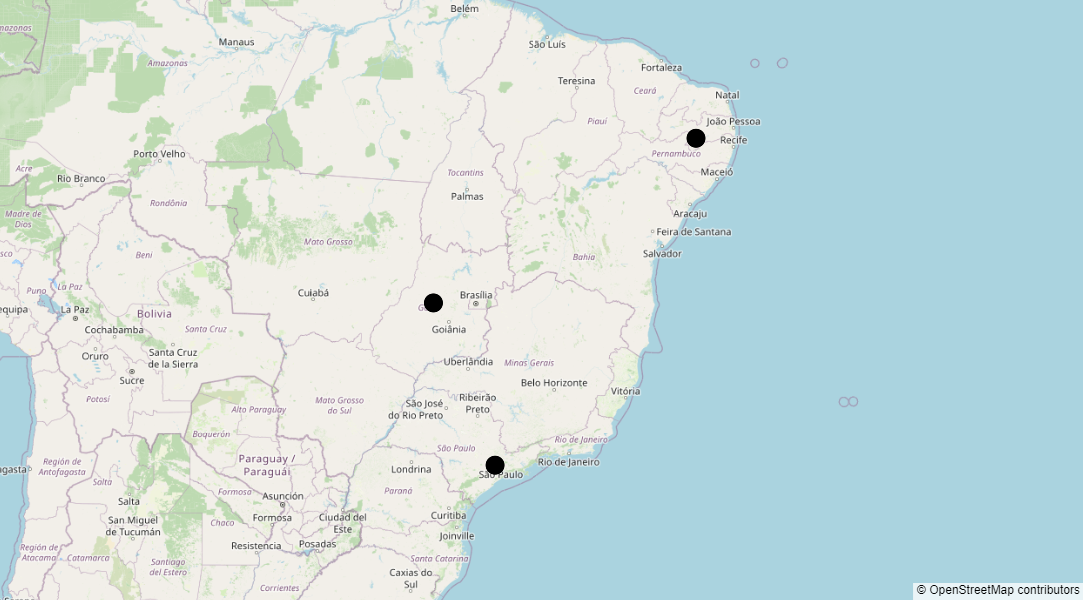

In [35]:
#Plotagem do mapa demonstrando a localização dos Centroide Regionais
fig7 = px.scatter_mapbox(centroides_mapa,
                       lat='LAT',
                       lon='LONG',
                       zoom = 3.8)
fig7.update_layout(mapbox_style = 'open-street-map')
fig7.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig7.update_traces(marker = dict(size=20, color='black'))
fig7.show()

### Consolidação das Bases de Dados processadas 

In [36]:
#Atualização da base de dados final com inserção da cidade sugerida como Centroide Geral
dados_clusters = dados_clusters.append({'MES':0 ,
                                          'ANO':0,
                                          'CIDADE':'Pirapora',
                                          'ESTADO': 'MG',
                                          'CAPITAL':'NAO',
                                          'LAT':-17.58,
                                          'LONG': -45.17,
                                          'QTD_VENDAS':0,
                                          'REGIAO':'Sudeste',
                                          'CLUSTER':4} , ignore_index=True)
dados_clusters

C:\Users\Caio\AppData\Local\Temp\ipykernel_4904\3381178364.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



MES   ANO     CIDADE ESTADO CAPITAL    LAT   LONG  QTD_VENDAS  \
0      1  2018  Sao Paulo     SP     SIM -23.54 -46.63       10000   
1      2  2018  Sao Paulo     SP     SIM -23.54 -46.63       12000   
2      3  2018  Sao Paulo     SP     SIM -23.54 -46.63        9000   
3      4  2018  Sao Paulo     SP     SIM -23.54 -46.63        8000   
4      5  2018  Sao Paulo     SP     SIM -23.54 -46.63        8500   
..   ...   ...        ...    ...     ...    ...    ...         ...   
956    9  2022   Brasilia     DF     SIM -15.77 -47.93        6408   
957   10  2022   Brasilia     DF     SIM -15.77 -47.93        7056   
958   11  2022   Brasilia     DF     SIM -15.77 -47.93        7128   
959   12  2022   Brasilia     DF     SIM -15.77 -47.93       10080   
960    0     0   Pirapora     MG     NAO -17.58 -45.17           0   

           REGIAO  CLUSTER  
0         Sudeste        1  
1         Sudeste        1  
2         Sudeste        1  
3         Sudeste        1  
4         Sudeste        1  
..            ...      ...  
956  Centro Oeste        2  
957  Centro Oeste        2  
958  Centro Oeste        2  
959  Centro Oeste        2  
960       Sudeste        4  

[961 rows x 10 columns]

In [37]:
#Criação de base com dados apenas sobre as cidades e seus atributos
base_cidades = dados_clusters[['CIDADE', 'ESTADO', 'CAPITAL', 'LAT', 'LONG', 'REGIAO', 'CLUSTER']].groupby(['CIDADE',
                'ESTADO', 'CAPITAL', 'LAT', 'LONG', 'REGIAO', 'CLUSTER']).mean().sort_values(by='CLUSTER',
                ascending=True).reset_index()
base_cidades

CIDADE ESTADO CAPITAL    LAT   LONG        REGIAO  \
0                     Salvador     BA     SIM -12.97 -38.51      Nordeste   
1                    Fortaleza     CE     SIM  -3.71 -38.54      Nordeste   
2                        Natal     RN     SIM  -5.79 -35.20      Nordeste   
3                       Recife     PE     SIM  -8.05 -34.88      Nordeste   
4               Belo Horizonte     MG     SIM -19.81 -43.95       Sudeste   
5   Santa Rita do Passa Quatro     SP     NAO -21.70 -47.47       Sudeste   
6               Rio de Janeiro     RJ     SIM -22.90 -43.20       Sudeste   
7               Ribeirao Preto     SP     NAO -21.17 -47.81       Sudeste   
8                 Porto Alegre     RS     SIM -30.03 -51.22           Sul   
9                    Sao Paulo     SP     SIM -23.54 -46.63       Sudeste   
10                    Curitiba     PR     SIM -25.42 -49.27           Sul   
11         Sao Jose dos Campos     SP     NAO -23.17 -45.88       Sudeste   
12                      Palmas     TO     SIM -10.16 -48.33         Norte   
13                     Goiania     GO     SIM -16.67 -49.25  Centro Oeste   
14                Campo Grande     MS     SIM -20.44 -54.64  Centro Oeste   
15                    Brasilia     DF     SIM -15.77 -47.93  Centro Oeste   
16                    Pirapora     MG     NAO -17.58 -45.17       Sudeste   

    CLUSTER  
0         0  
1         0  
2         0  
3         0  
4         1  
5         1  
6         1  
7         1  
8         1  
9         1  
10        1  
11        1  
12        2  
13        2  
14        2  
15        2  
16        4

### Exportação dos Dados

In [38]:
#Tratativa da base de dados de cidades para importação na Ferramenta My Maps
base_cidades['LAT'] = base_cidades['LAT'].astype(str)
base_cidades['LONG'] = base_cidades['LONG'].astype(str)
base_cidades['LAT'] = base_cidades['LAT'].str.replace('.',',')
base_cidades['LONG'] = base_cidades['LONG'].str.replace('.',',')

C:\Users\Caio\AppData\Local\Temp\ipykernel_4904\3852227305.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Caio\AppData\Local\Temp\ipykernel_4904\3852227305.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [39]:
#Exportação de base de dados de cidades
base_cidades.to_csv('BASE_CIDADES.csv', sep=';', index=False)

In [40]:
#Exportação de base de dados final com inserção da cidade sugerida como Centroide Geral
dados_clusters.to_csv('BASE_CLUSTERS_FINAL.csv', sep=';', index=False)